In [6]:
# install kagglee
!pip install -q kaggle

Nama: Putri Wulandari

Kelas: Machine Learning dan Front End

Proyek Kedua : Membuat Model Machine Learning dengan Data Time Series

In [7]:
# uploaddd kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"putriwulandari12345","key":"983467ba58df84cfd8fd9df601c25432"}'}

In [8]:
# make directory dan change permissionnn
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [9]:
# download dataset,
!kaggle datasets download -d meetnagadia/apple-stock-price-from-19802021

  0% 0.00/206k [00:00<?, ?B/s]
100% 206k/206k [00:00<00:00, 72.1MB/s]


In [10]:
from zipfile import ZipFile
file_name = "/content/apple-stock-price-from-19802021.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [11]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [12]:
data_trainn = pd.read_csv('/content/AAPL.csv')
data_trainn.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [13]:
# data info
data_trainn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [14]:
data_trainn.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
data_trainn.isnull()


,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
10463,False,False,False,False,False,False,False
10464,False,False,False,False,False,False,False
10465,False,False,False,False,False,False,False
10466,False,False,False,False,False,False,False


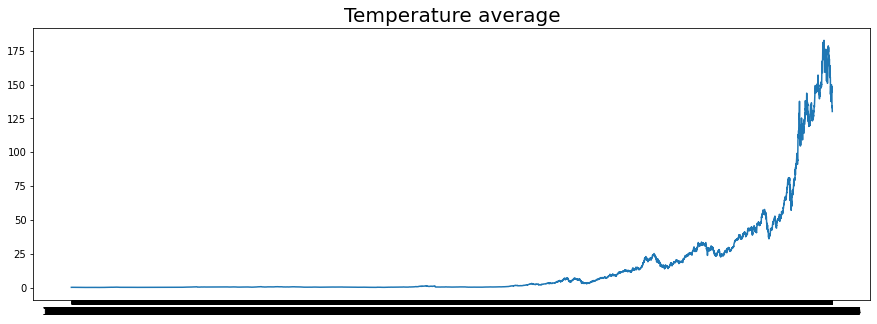

In [16]:
date = data_trainn['Date'].values
category  = data_trainn['Open'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(date, category)
plt.title('Temperature average',
          fontsize=20);

In [17]:
date = data_trainn['Date'].values
category  = data_trainn['Open'].values

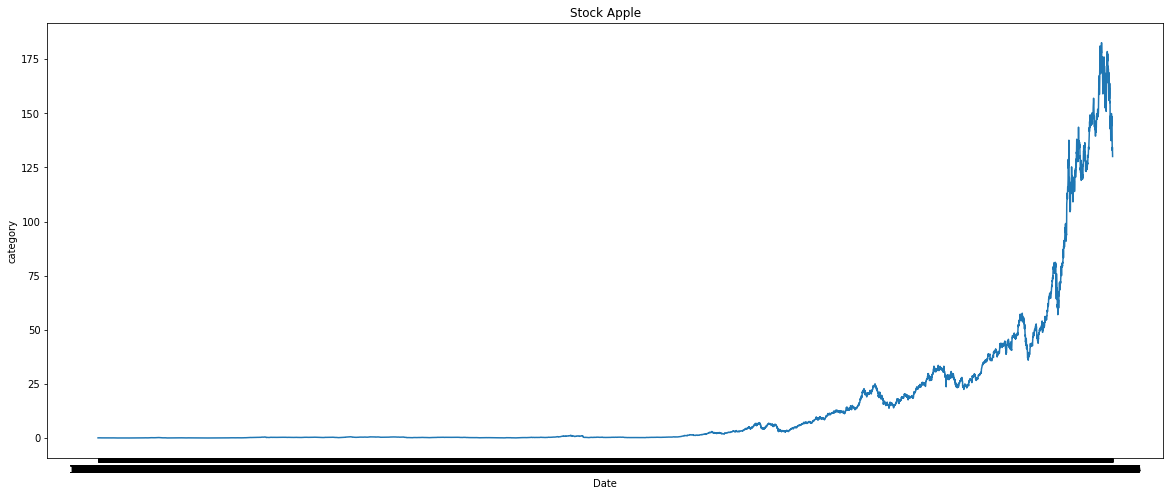

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.plot(date, category)
plt.title('Stock Apple')
plt.xlabel('Date')
plt.ylabel('category')
plt.show()

In [19]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  
    series = tf.expand_dims(series, axis=-1)
    dt = tf.data.Dataset.from_tensor_slices(series)
    dt = dt.window(window_size + 1, shift=1, drop_remainder=True)
    dt = dt.flat_map(lambda w: w.batch(window_size + 1))
    dt = dt.shuffle(shuffle_buffer)
    dt = dt.map(lambda w: (w[:-1], w[-1:]))
    return dt.batch(batch_size).prefetch(1)

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(category, date, test_size = 0.2, random_state = 0 , shuffle=False)
print(len(x_train), len(x_test))

8374 2094


In [21]:
#MODEL

from keras.layers import Dense, LSTM

train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=5000)
test_set = windowed_dataset(x_test, window_size=60, batch_size=100, shuffle_buffer=5000)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [22]:
max = data_trainn['Open'].max()
print('Max value : ' )
print(max)

Max value : 
182.630005


In [23]:
min = data_trainn['Open'].min()
print('Min Value : ')
print(min)

Min Value : 
0.049665


In [90]:
x = (182.630005 - 0.049665 ) * (10 / 100)
print(x)

18.258034000000002


In [24]:
# CALLBACK
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')< x):
      self.model.stop_training = True
      print("\nMAE of the model < 10% of data scale")
callbacks = myCallback()

In [25]:
history = model.fit(train_set,epochs=80,validation_data=test_set)

Epoch 1/80
84/84 [==============================] - 27s 256ms/step - loss: 11.4450 - mae: 11.8877 - val_loss: 93.1799 - val_mae: 93.6799
Epoch 2/80
84/84 [==============================] - 13s 149ms/step - loss: 10.2735 - mae: 10.7036 - val_loss: 90.5969 - val_mae: 91.0969
Epoch 3/80
84/84 [==============================] - 13s 148ms/step - loss: 9.6437 - mae: 10.0794 - val_loss: 88.4750 - val_mae: 88.9750
Epoch 4/80
84/84 [==============================] - 15s 173ms/step - loss: 9.0255 - mae: 9.4599 - val_loss: 86.5346 - val_mae: 87.0346
Epoch 5/80
84/84 [==============================] - 13s 145ms/step - loss: 8.4158 - mae: 8.8477 - val_loss: 84.7556 - val_mae: 85.2555
Epoch 6/80
84/84 [==============================] - 13s 148ms/step - loss: 7.8194 - mae: 8.2454 - val_loss: 83.1321 - val_mae: 83.6321
Epoch 7/80
84/84 [==============================] - 16s 178ms/step - loss: 7.2375 - mae: 7.6617 - val_loss: 81.6642 - val_mae: 82.1642
Epoch 8/80
84/84 [==============================] 

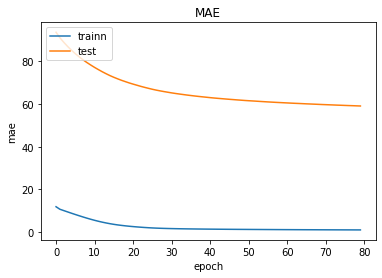

In [26]:
# plot dari MAEE

import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['trainn', 'test'], loc='upper left')
plt.show()

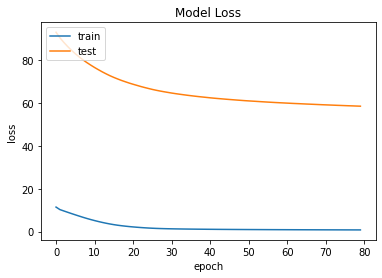

In [27]:
# plot dari LOSS

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()